In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from six import StringIO
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
df = pd.read_csv("C:\\Users\\reauter\\Desktop\\New folder (3)\\NFBNIFC12.csv")
#df.columns = ["Full_Code","Name", "Code","L.Trade", "Bid Vol","Bid","Ask","Ask Vol","Volume","High","Low","P.Close","+/- %"]
#df.drop(df.columns[7:9], axis=1, inplace=True)
df

,Date,Time,Open,High,Low,Close,Volume,Close-Open,>100,<= 100,Status,P
0,2019-06-25,13:15:00,30685.30,30767.20,30673.05,30739.95,1605120.0,-0.05,NaN,False,NaN,Loss
1,2019-06-25,13:30:00,30740.00,30780.00,30722.30,30769.90,111480.0,5.35,NaN,False,NaN,Profit
2,2019-06-25,13:45:00,30764.55,30825.00,30759.05,30801.15,170920.0,0.15,NaN,False,NaN,Profit
3,2019-06-25,14:00:00,30801.00,30816.45,30774.10,30782.05,94200.0,1.85,NaN,False,NaN,Loss
4,2019-06-25,14:15:00,30780.20,30891.00,30777.00,30861.65,224800.0,-2.25,NaN,False,NaN,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...
18531,2022-06-17,11:15:00,32728.30,32771.00,32676.95,32715.00,71275.0,-0.05,NaN,False,NaN,Profit
18532,2022-06-17,11:30:00,32715.05,32768.15,32587.20,32590.25,124325.0,32590.25,NaN,True,NaN,Profit
18533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,False,NaN,None
18534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,False,NaN,None


In [2]:
df.set_index('Date')

,Time,Open,High,Low,Close,Volume,Close-Open,>100,<= 100,Status,P
Date,,,,,,,,,,,
2019-06-25,13:15:00,30685.30,30767.20,30673.05,30739.95,1605120.0,-0.05,NaN,False,NaN,Loss
2019-06-25,13:30:00,30740.00,30780.00,30722.30,30769.90,111480.0,5.35,NaN,False,NaN,Profit
2019-06-25,13:45:00,30764.55,30825.00,30759.05,30801.15,170920.0,0.15,NaN,False,NaN,Profit
2019-06-25,14:00:00,30801.00,30816.45,30774.10,30782.05,94200.0,1.85,NaN,False,NaN,Loss
2019-06-25,14:15:00,30780.20,30891.00,30777.00,30861.65,224800.0,-2.25,NaN,False,NaN,Loss
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-17,11:15:00,32728.30,32771.00,32676.95,32715.00,71275.0,-0.05,NaN,False,NaN,Profit
2022-06-17,11:30:00,32715.05,32768.15,32587.20,32590.25,124325.0,32590.25,NaN,True,NaN,Profit
NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,False,NaN,None


In [3]:
df.loc[2]

Date          2019-06-25
Time            13:45:00
Open            30764.55
High             30825.0
Low             30759.05
Close           30801.15
Volume          170920.0
Close-Open          0.15
>100                 NaN
<= 100             False
Status               NaN
P                 Profit
Name: 2, dtype: object

In [16]:
#df['Time'] = np.where(df['Time']=='15:30:00',df['Close'], df['Close-Open'])

In [17]:
#df['Time']

0           -0.05
1            5.35
2            0.15
3            1.85
4           -2.25
           ...   
18531       -0.05
18532    32590.25
18533        0.00
18534        0.00
18535        0.00
Name: Time, Length: 18536, dtype: float64

In [4]:
df['Date']

0        2019-06-25
1        2019-06-25
2        2019-06-25
3        2019-06-25
4        2019-06-25
            ...    
18531    2022-06-17
18532    2022-06-17
18533           NaN
18534           NaN
18535           NaN
Name: Date, Length: 18536, dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df

,Date,Time,Open,High,Low,Close,Volume,Close-Open,>100,<= 100,Status,P
0,2019-06-25,13:15:00,30685.30,30767.20,30673.05,30739.95,1605120.0,-0.05,NaN,False,NaN,Loss
1,2019-06-25,13:30:00,30740.00,30780.00,30722.30,30769.90,111480.0,5.35,NaN,False,NaN,Profit
2,2019-06-25,13:45:00,30764.55,30825.00,30759.05,30801.15,170920.0,0.15,NaN,False,NaN,Profit
3,2019-06-25,14:00:00,30801.00,30816.45,30774.10,30782.05,94200.0,1.85,NaN,False,NaN,Loss
4,2019-06-25,14:15:00,30780.20,30891.00,30777.00,30861.65,224800.0,-2.25,NaN,False,NaN,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...
18531,2022-06-17,11:15:00,32728.30,32771.00,32676.95,32715.00,71275.0,-0.05,NaN,False,NaN,Profit
18532,2022-06-17,11:30:00,32715.05,32768.15,32587.20,32590.25,124325.0,32590.25,NaN,True,NaN,Profit
18533,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,False,NaN,None
18534,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,False,NaN,None


In [48]:
#To paste this dataframe to csv file
df.to_csv("C:\\Users\\reauter\\Desktop\\New folder (3)\\NFBNIFC12.csv", index=False)

In [7]:
#Extracting Monthly data from date format
df['Month'] = pd.to_datetime(df.Date, format='%d/%m/%Y').dt.month_name()

In [8]:
df['Month']

0        June
1        June
2        June
3        June
4        June
         ... 
18531    June
18532    June
18533     NaN
18534     NaN
18535     NaN
Name: Month, Length: 18536, dtype: object

In [9]:
#Determining 7 times of a day
df['times_of_day'] = pd.to_datetime(df.Time, format='%H:%M:%S')
a = df.assign(dept_session=pd.cut(df.times_of_day.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
df['times_of_day'] = a['dept_session']

In [10]:
df['times_of_day']

0        Afternoon
1        Afternoon
2        Afternoon
3        Afternoon
4        Afternoon
           ...    
18531      Morning
18532      Morning
18533          NaN
18534          NaN
18535          NaN
Name: times_of_day, Length: 18536, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

In [12]:
#To paste this dataframe to csv file
df.to_csv("C:\\Users\\reauter\\Desktop\\New folder (3)\\NFBNIFC12.csv", index=False)

In [60]:
#12 Dimensionality Reduction Techniques (with Python codes)
#Low Variance Filter
df.var()

C:\Users\reauter\AppData\Local\Temp/ipykernel_24016/44798741.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Open          3.496528e+07
High          3.491354e+07
Low           3.500701e+07
Close         3.496402e+07
Volume        1.745645e+10
Close-Open    6.069514e+04
>100          0.000000e+00
<= 100        9.669953e-03
dtype: float64

In [ ]:
#he variance of <=100 column is very low.Sp we can safely drop this column.


In [61]:
#High Correlation filter
df.corr()

,Open,High,Low,Close,Volume,Close-Open,<= 100
Open,1.000000,0.999935,0.999932,0.999891,-0.325097,0.002836,0.007501
High,0.999935,1.000000,0.999890,0.999939,-0.321831,0.002860,0.007359
Low,0.999932,0.999890,1.000000,0.999944,-0.328181,0.002761,0.007864
Close,0.999891,0.999939,0.999944,1.000000,-0.324838,0.002702,0.007636
Volume,-0.325097,-0.321831,-0.328181,-0.324838,1.000000,-0.003026,0.045040
Close-Open,0.002836,0.002860,0.002761,0.002702,-0.003026,1.000000,0.212671
<= 100,0.007501,0.007359,0.007864,0.007636,0.045040,0.212671,1.000000


In [ ]:
#There is high correlation among HIGH,LOW,CLOSE,OPEN column.Dropping these columns would be prudent.
#But this domains are important for trading as well.


In [63]:
df

,Date,Open,High,Low,Close,Volume,Close-Open,<= 100,Time_10:00:00,Time_10:15:00,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,times_of_day_Night,times_of_day_Morning,times_of_day_Afternoon,times_of_day_Evening
0,2019-06-25,30685.30,30767.20,30673.05,30739.95,1605120.0,-0.05,False,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2019-06-25,30740.00,30780.00,30722.30,30769.90,111480.0,5.35,False,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2019-06-25,30764.55,30825.00,30759.05,30801.15,170920.0,0.15,False,0,0,...,1,0,0,0,0,0,0,0,1,0
3,2019-06-25,30801.00,30816.45,30774.10,30782.05,94200.0,1.85,False,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2019-06-25,30780.20,30891.00,30777.00,30861.65,224800.0,-2.25,False,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18531,2022-06-17,32728.30,32771.00,32676.95,32715.00,71275.0,-0.05,False,0,0,...,1,0,0,0,0,0,0,1,0,0
18532,2022-06-17,32715.05,32768.15,32587.20,32590.25,124325.0,32590.25,True,0,0,...,1,0,0,0,0,0,0,1,0,0
18533,NaT,NaN,NaN,NaN,NaN,NaN,0.00,False,0,0,...,0,0,0,0,0,0,0,0,0,0
18534,NaT,NaN,NaN,NaN,NaN,NaN,0.00,False,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
train=df.drop(df.columns[0:1], axis=1, inplace=True)
df
train=df.drop(df.columns[5:6], axis=1, inplace=True)
df

,Close,Volume,Close-Open,<= 100,Time_10:15:00,Time_10:45:00,Time_11:00:00,Time_11:15:00,Time_11:30:00,Time_11:45:00,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,times_of_day_Night,times_of_day_Morning,times_of_day_Afternoon,times_of_day_Evening
0,30739.95,1605120.0,-0.05,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,30769.90,111480.0,5.35,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,30801.15,170920.0,0.15,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,30782.05,94200.0,1.85,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,30861.65,224800.0,-2.25,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18531,32715.00,71275.0,-0.05,False,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
18532,32590.25,124325.0,32590.25,True,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
18533,NaN,NaN,0.00,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18534,NaN,NaN,0.00,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


RandomForestRegressor(max_depth=10, random_state=1)

In [70]:
df2=df.dropna().reset_index(drop=True)


In [71]:
df2

,Close,Volume,Close-Open,<= 100,Time_10:15:00,Time_10:45:00,Time_11:00:00,Time_11:15:00,Time_11:30:00,Time_11:45:00,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,times_of_day_Night,times_of_day_Morning,times_of_day_Afternoon,times_of_day_Evening
0,30739.95,1605120.0,-0.05,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,30769.90,111480.0,5.35,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,30801.15,170920.0,0.15,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,30782.05,94200.0,1.85,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,30861.65,224800.0,-2.25,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18528,32646.75,89825.0,-8.25,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
18529,32706.90,124325.0,4.90,False,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
18530,32723.95,61300.0,-4.35,False,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
18531,32715.00,71275.0,-0.05,False,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [80]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
#df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df2,df2.Close)

RandomForestRegressor(max_depth=10, random_state=1)

In [81]:
#For RandomForest there should be only quantitative data and there couldn't be any NaN in the data.
#After fitting the model, plot the feature importance graph:

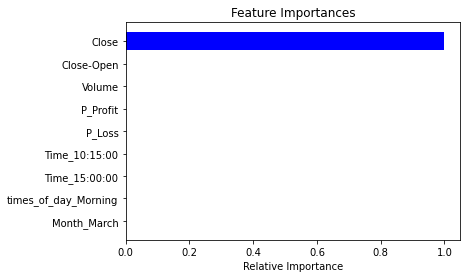

In [82]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [84]:
#, we can use the SelectFromModel of sklearn to do so. 
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df2,df2.Close)

In [85]:
#Forward Feature Selection
from sklearn.feature_selection import f_regression
ffs = f_regression(df2,df2.Close )

In [87]:
variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:
       variable.append(df.columns[i])

In [88]:
variable

['Close',
 'Volume',
 'Month_April',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_May',
 'Month_November',
 'Month_September']

In [93]:
#Factor Analysis
df

,Date,Time,Open,High,Low,Close,Volume,Close-Open,>100,<= 100,Status,P
0,2019-06-25,13:15:00,30685.30,30767.20,30673.05,30739.95,1605120.0,-0.05,NaN,False,NaN,Loss
1,2019-06-25,13:30:00,30740.00,30780.00,30722.30,30769.90,111480.0,5.35,NaN,False,NaN,Profit
2,2019-06-25,13:45:00,30764.55,30825.00,30759.05,30801.15,170920.0,0.15,NaN,False,NaN,Profit
3,2019-06-25,14:00:00,30801.00,30816.45,30774.10,30782.05,94200.0,1.85,NaN,False,NaN,Loss
4,2019-06-25,14:15:00,30780.20,30891.00,30777.00,30861.65,224800.0,-2.25,NaN,False,NaN,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...
18531,2022-06-17,11:15:00,32728.30,32771.00,32676.95,32715.00,71275.0,-0.05,NaN,False,NaN,Profit
18532,2022-06-17,11:30:00,32715.05,32768.15,32587.20,32590.25,124325.0,32590.25,NaN,True,NaN,Profit
18533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,False,NaN,None
18534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,False,NaN,None


In [95]:
df.drop(df.columns[0:1], axis=1, inplace=True)
df

,Open,High,Low,Close,Volume,Close-Open,>100,<= 100,Status,P
0,30685.30,30767.20,30673.05,30739.95,1605120.0,-0.05,NaN,False,NaN,Loss
1,30740.00,30780.00,30722.30,30769.90,111480.0,5.35,NaN,False,NaN,Profit
2,30764.55,30825.00,30759.05,30801.15,170920.0,0.15,NaN,False,NaN,Profit
3,30801.00,30816.45,30774.10,30782.05,94200.0,1.85,NaN,False,NaN,Loss
4,30780.20,30891.00,30777.00,30861.65,224800.0,-2.25,NaN,False,NaN,Loss
...,...,...,...,...,...,...,...,...,...,...
18531,32728.30,32771.00,32676.95,32715.00,71275.0,-0.05,NaN,False,NaN,Profit
18532,32715.05,32768.15,32587.20,32590.25,124325.0,32590.25,NaN,True,NaN,Profit
18533,NaN,NaN,NaN,NaN,NaN,0.00,NaN,False,NaN,None
18534,NaN,NaN,NaN,NaN,NaN,0.00,NaN,False,NaN,None


In [98]:
df.drop(df.columns[6:7], axis=1, inplace=True)
df

,Open,High,Low,Close,Volume,Close-Open,P
0,30685.30,30767.20,30673.05,30739.95,1605120.0,-0.05,Loss
1,30740.00,30780.00,30722.30,30769.90,111480.0,5.35,Profit
2,30764.55,30825.00,30759.05,30801.15,170920.0,0.15,Profit
3,30801.00,30816.45,30774.10,30782.05,94200.0,1.85,Loss
4,30780.20,30891.00,30777.00,30861.65,224800.0,-2.25,Loss
...,...,...,...,...,...,...,...
18531,32728.30,32771.00,32676.95,32715.00,71275.0,-0.05,Profit
18532,32715.05,32768.15,32587.20,32590.25,124325.0,32590.25,Profit
18533,NaN,NaN,NaN,NaN,NaN,0.00,None
18534,NaN,NaN,NaN,NaN,NaN,0.00,None


In [101]:
'''
Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset.
Factorability means "can we found the factors in the dataset?".
There are two methods to check the factorability or sampling adequacy:
'''

'\nAdequacy Test\nBefore you perform factor analysis, you need to evaluate the “factorability” of our dataset.\nFactorability means "can we found the factors in the dataset?".\nThere are two methods to check the factorability or sampling adequacy:\n'

In [108]:
df2
df2.

,Close,Volume,Close-Open,<= 100,Time_10:15:00,Time_10:45:00,Time_11:00:00,Time_11:15:00,Time_11:30:00,Time_11:45:00,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,times_of_day_Night,times_of_day_Morning,times_of_day_Afternoon,times_of_day_Evening
0,30739.95,1605120.0,-0.05,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,30769.90,111480.0,5.35,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,30801.15,170920.0,0.15,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,30782.05,94200.0,1.85,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,30861.65,224800.0,-2.25,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18528,32646.75,89825.0,-8.25,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
18529,32706.90,124325.0,4.90,False,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
18530,32723.95,61300.0,-4.35,False,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
18531,32715.00,71275.0,-0.05,False,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [119]:
df2.drop(df2.columns[2:3], axis=1, inplace=True)
df2

,Close,Volume,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,times_of_day_Night,times_of_day_Morning,times_of_day_Afternoon,times_of_day_Evening
0,30739.95,1605120.0,0,1,0,0,0,0,0,0,0,1,0
1,30769.90,111480.0,0,1,0,0,0,0,0,0,0,1,0
2,30801.15,170920.0,0,1,0,0,0,0,0,0,0,1,0
3,30782.05,94200.0,0,1,0,0,0,0,0,0,0,1,0
4,30861.65,224800.0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18528,32646.75,89825.0,0,1,0,0,0,0,0,0,1,0,0
18529,32706.90,124325.0,0,1,0,0,0,0,0,0,1,0,0
18530,32723.95,61300.0,0,1,0,0,0,0,0,0,1,0,0
18531,32715.00,71275.0,0,1,0,0,0,0,0,0,1,0,0


In [134]:
df

,Open,High,Low,Close,Volume
0,30685.30,30767.20,30673.05,30739.95,1605120.0
1,30740.00,30780.00,30722.30,30769.90,111480.0
2,30764.55,30825.00,30759.05,30801.15,170920.0
3,30801.00,30816.45,30774.10,30782.05,94200.0
4,30780.20,30891.00,30777.00,30861.65,224800.0
...,...,...,...,...,...
18528,32635.00,32694.45,32615.10,32646.75,89825.0
18529,32655.00,32792.85,32633.00,32706.90,124325.0
18530,32702.00,32758.05,32660.00,32723.95,61300.0
18531,32728.30,32771.00,32676.95,32715.00,71275.0


In [124]:
df.drop(df.columns[5:7], axis=1, inplace=True)
df

,Open,High,Low,Close,Volume
0,30685.30,30767.20,30673.05,30739.95,1605120.0
1,30740.00,30780.00,30722.30,30769.90,111480.0
2,30764.55,30825.00,30759.05,30801.15,170920.0
3,30801.00,30816.45,30774.10,30782.05,94200.0
4,30780.20,30891.00,30777.00,30861.65,224800.0
...,...,...,...,...,...
18531,32728.30,32771.00,32676.95,32715.00,71275.0
18532,32715.05,32768.15,32587.20,32590.25,124325.0
18533,NaN,NaN,NaN,NaN,NaN
18534,NaN,NaN,NaN,NaN,NaN


In [127]:
df=df.dropna().reset_index(drop=True)

In [129]:
#Bartlett’s test 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(524147.4246190692, 0.0)

In [132]:
#KMO TEST
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [133]:
kmo_model

0.6833837673575869

In [135]:
'''
Since the value of the kmo model is more than 0.6 so 
we can say the model is adequate for factor analysis
'''


'\nSince the value of the kmo model is more than 0.6 so \nwe can say the model is adequate for factor analysis\n'

In [165]:
fa = FactorAnalyzer(2, rotation="varimax", method='minres', use_smc=True)
fa.fit(df)


FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [166]:
fa.loadings_

array([[ 0.99921887, -0.01580657],
       [ 0.99932836, -0.00840386],
       [ 0.99911872, -0.02279537],
       [ 0.99923143, -0.01521715],
       [-0.31847773,  0.43429517]])

In [167]:
fa.get_communalities()

array([0.9986882 , 0.9987278 , 0.99875784, 0.99869501, 0.29004036])

In [168]:
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=df.columns)
print('Factor Loadings \n%s' %loadings)


Factor Loadings 
        Factor 1  Factor 2
Open    0.999219 -0.015807
High    0.999328 -0.008404
Low     0.999119 -0.022795
Close   0.999231 -0.015217
Volume -0.318478  0.434295


In [169]:
'''
Start with the Varimax rotation

The method can be set as minres, ml or principal.We can start to minres, while performing Varimax rotation.

Change the method to maximum likelihood but still use Varimax rotation. 

Two logical choices are available for whether to use squared multiple correlation as starting guesses for factor analysis. Always start with smc (e.g. squared multiple correlation) and try maximum absolute correlation as second.  We can specify this by setting use_smc=True. 

Compare the solutions and keep the one that works the best.

Evaluate factor loadings and consider a different factor solution: one higher and one lower than the chosen k (in our current case four).  

If we partition the data, we can now try the solution on test data. 
'''

'\nStart with the Varimax rotation\n\nThe method can be set as minres, ml or principal.We can start to minres, while performing Varimax rotation.\n\nChange the method to maximum likelihood but still use Varimax rotation. \n\nTwo logical choices are available for whether to use squared multiple correlation as starting guesses for factor analysis. Always start with smc (e.g. squared multiple correlation) and try maximum absolute correlation as second.  We can specify this by setting use_smc=True. \n\nCompare the solutions and keep the one that works the best.\n\nEvaluate factor loadings and consider a different factor solution: one higher and one lower than the chosen k (in our current case four).  \n\nIf we partition the data, we can now try the solution on test data. \n'

In [170]:
'''
Loadings close to -1 or 1 indicate that the factor strongly influences the variable.
Loadings close to 0 indicate that the factor has a weak influence on the variable.
Some variables may have high loadings on multiple factors.
Unrotated factor loadings are often difficult to interpret.
'''

'\nLoadings close to -1 or 1 indicate that the factor strongly influences the variable.\nLoadings close to 0 indicate that the factor has a weak influence on the variable.\nSome variables may have high loadings on multiple factors.\nUnrotated factor loadings are often difficult to interpret.\n'

In [ ]:
'''
Open,High,Low,Close are creating Factor 1 and Volume is creating factor 2.
'''
